>

# Project: Investigate a Dataset (TMDB  Movie DataSet)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contain information about 10,000 movies collected from the movie data base including user ratings and revenue. It consist of  10866 rows and 21 columns such as imdb_id, revenue, budget, vote_count etc.
>
 ## Questions to be answered from this Dataset
 <ol type="1">
  <li>most popular genre</li>
  <li>Minimum and maximum Revenue</li>
  <li>Average runtime of all the movies by the year</li>
  <li>in what year was the most profitable and least profitable movie occured</li> 
  <li>What  characteristics are associated with movies that have higher revenues</li>   
</ol>  


In [2]:
#importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
#dimension of the dataset
df.shape

(10866, 21)

In [5]:
#all columns in the dataset
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


### Dropping columns that are not needed for this analysis and cleaning the data

In [6]:
#drop columns that are not needed for this analysis
df.drop(['imdb_id', 'budget_adj', 'revenue_adj', 'original_title', 'homepage', 'keywords','cast',
       'director', 'tagline', 'production_companies', 'overview'],
        axis=1, inplace=True)

In [7]:
#preview the dataset after some columns have been dropped
df.head(1)

,id,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [8]:
# check for duplicates in the data
sum(df.duplicated())

1

In [9]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [10]:
#concise summary of the dataset including non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10865 non-null  int64  
 1   popularity    10865 non-null  float64
 2   budget        10865 non-null  int64  
 3   revenue       10865 non-null  int64  
 4   runtime       10865 non-null  int64  
 5   genres        10842 non-null  object 
 6   release_date  10865 non-null  object 
 7   vote_count    10865 non-null  int64  
 8   vote_average  10865 non-null  float64
 9   release_year  10865 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 933.7+ KB


In [11]:
#useful descriptive statistics for each column of tha dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [12]:
#the budget and revenue column has 0's in it, which is going to be removed in the line of code below.

template_list=['budget', 'revenue']

#replace all the value from '0' to NAN 
df[template_list] = df[template_list].replace(0, np.NAN)


In [13]:
# changing tht release_date column into python standard date format
df['release_date'] = pd.to_datetime(df['release_date'])
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
# previewing the changed dataset
df.head(1)

,id,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015


In [15]:
#replacing 0 with NaN in the runtime column of the dataset
df['runtime'] =df['runtime'].replace(0, np.NAN)

In [16]:
# drop all columns with nan in the dataframe
df.dropna(inplace=True)
df.shape

(3854, 10)

In [17]:
# check for null values
df.isna().sum()

id              0
popularity      0
budget          0
revenue         0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
release_year    0
dtype: int64

In [18]:
#returns the data type of the data set
df.dtypes

id                       int64
popularity             float64
budget                 float64
revenue                float64
runtime                float64
genres                  object
release_date    datetime64[ns]
vote_count               int64
vote_average           float64
release_year             int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (most popular genre)
first, we convert the genre column to a list and split each observtion into another list and convert into a dataframe. Then we group and count each genre using pandas groupby function.


In [19]:
#previewing the first two rows of the dataset
df.head(2)

,id,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015


In [20]:
#creatig a list for the column genre
A = list(df.genres)

In [21]:
#previewing the first three rows
A[:3]

['Action|Adventure|Science Fiction|Thriller',
 'Action|Adventure|Science Fiction|Thriller',
 'Adventure|Science Fiction|Thriller']

In [22]:
#changing the multiple values in the genre column seperated by a pipe into a comma
P=[]


for item in A:
    
    P.append(item.split('|'))

In [23]:
#displaying the first three rows
P[:3]

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller']]

In [24]:
K=[]
 
for items in P:
    for item in items:
        K.append(item)

In [25]:
#diaplaying the first four rows
K[:4]

['Action', 'Adventure', 'Science Fiction', 'Thriller']

In [26]:
df_genres= pd.DataFrame(K,columns=['genres'])

In [27]:
df_genres.nunique()

genres    20
dtype: int64

In [28]:
df1=df_genres.groupby('genres', as_index=False)['genres'].value_counts()

In [29]:
df1.set_index('genres', inplace= True)

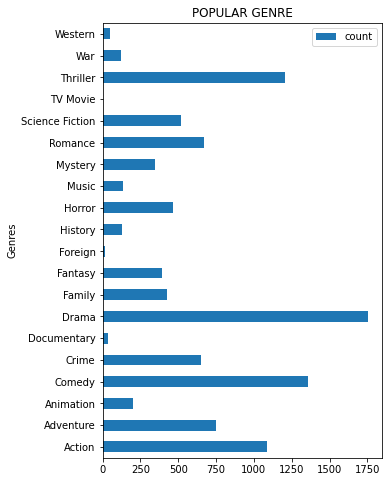

In [30]:
df1.plot(kind='barh', xlabel= 'Genres', title='POPULAR GENRE', figsize= (5,8));

from the chart above, we conclude that drama is the most popular genre

### Research Question 2  (Minimum and Maximum revenue )

In [31]:
#inserting profit earned to the column i.e revenue subtracted from budget 
df.insert(2,'profit_earned',df['revenue']-df['budget'])

#previewing the changes in the dataset
df.head(2)

,id,popularity,profit_earned,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,2.284364e+08,150000000.0,3.784364e+08,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015


In [32]:
def maxmin(dataframe, feature):
    
    # minimum observation
    minimum = dataframe.loc[df[feature].idxmin()]
    # maximum observation
    maximum = dataframe.loc[df[feature].idxmax()]
    # concatenate maximum and minimum value and return as a dataframe
    info=pd.concat([maximum, minimum], axis=1)
    return info

In [33]:
maxmin(df, 'revenue')

,1386,5067
id,19995,13537
popularity,9.432768,0.462609
profit_earned,2544505847.0,-5999998.0
budget,237000000.0,6000000.0
revenue,2781505847.0,2.0
runtime,162.0,94.0
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
vote_count,8458,46
vote_average,7.1,6.4


>Column with the id 13537 has the minimum revenue as 2.0, with the profit earned as -5999998.0 on a budget of 6000000.0 which appears to be a loss to the industry in the release year 2003.
>
>Column with the id 19995 has the maximum revenue has 2781505847.0, with the profit earned as 2544505847.0 on a budget of 237000000.0 which appears to be a great revenue generation to the industry in the release year 2009.
>


### Research Question 3  (Average runtime of all the movies by the years)

In [34]:
#find the average of the column runtime by the year column i.e the mean
df_runtime= df.groupby('release_year')['runtime'].mean()

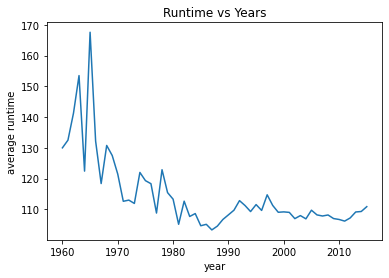

In [35]:
df_runtime.plot(kind= 'line', xlabel='year', ylabel= 'average runtime', title= 'Runtime vs Years');

the average runtime of the movies decreses by the year 

### Research Question 4  (in what year was the most profitable and least profitable movie occured)

In [36]:
#from the function profit earned

In [37]:
dfp= df.groupby('release_year')['profit_earned'].mean()

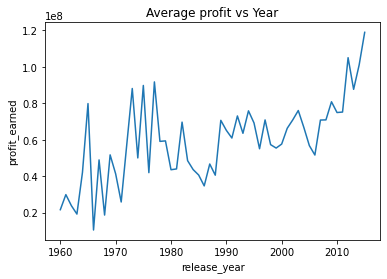

In [38]:
dfp.plot(kind= 'line', xlabel='release_year', ylabel='profit_earned', title= 'Average profit vs Year');

In [39]:
dfp.idxmin()

1966

In [40]:
dfp.idxmax()

2015

from the chat above, the industry has been profitable over the years with 1966 being the least profitable year and 2015 being the year with the highest profit.

### Research Question 5 (What  characteristics are associated with movies that have higher revenues)

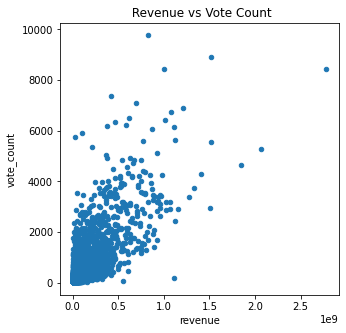

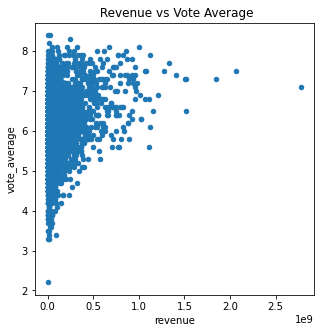

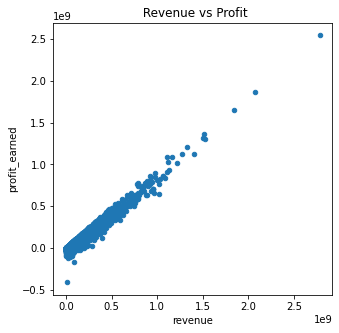

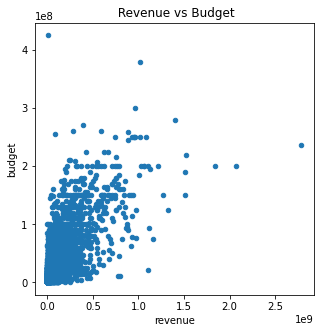

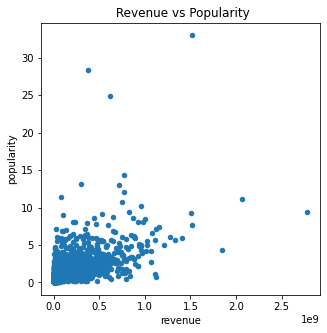

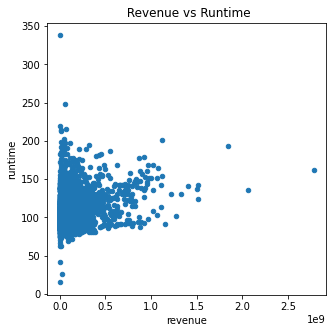

In [42]:
# a scattered diagram showing the realtionship between the revenue and all realted columns.
df.plot(kind='scatter', x='revenue', y='vote_count', figsize=(5,5), title=' Revenue vs Vote Count')
df.plot(kind='scatter', x='revenue', y='vote_average', figsize=(5,5), title=' Revenue vs Vote Average')
df.plot(kind='scatter', x='revenue', y='profit_earned', figsize=(5,5), title=' Revenue vs Profit')
df.plot(kind='scatter', x='revenue', y='budget', figsize=(5,5), title=' Revenue vs Budget')
df.plot(kind='scatter', x='revenue', y='popularity', figsize=(5,5), title=' Revenue vs Popularity')
df.plot(kind='scatter', x='revenue', y='runtime', figsize=(5,5), title=' Revenue vs Runtime')
plt.show()

From the above chart; We can see that, there's no sort of corellation between runtime and revenue. The higher the revenue, the higher the budget. More popularity can increase the revenue. the higher the revenue the higher the profit.

<a id='conclusions'></a>
## Conclusions

>After the analysis, we can conclude that in the movie industry :
<ol type="1">
<li>Drama is the most popular genre over the year, followed by comedy, thriller and action.</li> 
<li>Budget, vote count and popularity leads to high revenue and increased profit.</li>  
<li>over the years,the voting average of movies reduced</li>   
<li>The industry produces more movies over the years.</li>
<li>the average runtime of movies has reduced significantly over the years.</li>
<li>The movie industry has been making consistent profit over the years, regardless of the reduction on the vote average </li> </ol> 

### Limitations

There were 10,866 observations in the raw dataset. There were null and invalid values in features like budget, revenue and runtime having zeros, they were replaced with zeros and was eventually dropped. The data also contains duplicate values which were dropped from the data set. There were outliers in the dataset for example runtime of some movies is 1 minute, 2 minutes etc which would affect the statistics done during the Analysis. Eventually only 3,850 observations were used for the analysis.